In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My Drive/FastAI/main

/content/drive/My Drive/FastAI/main


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['uncased-l12-h768-a12', 'jigsaw-toxic-comment-classification-challenge', 'infineon']


In [0]:
from fastai.text import *

In [5]:
train = pd.read_csv("../input/infineon/infineonTrainDataTransformed.csv", encoding="ISO-8859-1")
train.head()

,id,comment_text,Natural Resources,Music and Audio,Platforms,Information Technology,Messaging and Telecommunications,Transportation,Consumer Goods,Real Estate,Video,Navigation and Mapping,Artificial Intelligence,Clothing and Apparel,Administrative Services,Energy,Travel and Tourism,Internet Services,Education,Commerce and Shopping,Sports,Lending and Investments,Sustainability,Biotechnology,Science and Engineering,Data and Analytics,Hardware,Content and Publishing,Gaming,Sales and Marketing,Financial Services,Government and Military,Mobile,Media and Entertainment,Events,Payments,Consumer Electronics,Health Care,Food and Beverage,Software,Professional Services,Design,Agriculture and Farming,Privacy and Security,Advertising,Manufacturing,Community and Lifestyle,Apps
0,35440,enlighted is an iot platform for commercial re...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13117,darrb is a platform that connects people who w...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,44816,grand perfecta is a leading provider of data a...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4710,iapp4me offers tools that enable its users to ...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,26697,dealfaint provide top quality products and unp...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
train['comment_text'] = train['comment_text'].str.replace('([“”¨«»®´·º½¾¿¡§£₤‘’])', '')

In [0]:
train['comment_text'].isna().any()

True

In [0]:
train=train.dropna()

In [0]:
len(train)

40668

In [0]:
test = pd.read_csv("../input/infineon/infineonTestDataTransformed.csv", encoding="ISO-8859-1")

test_id = test['id']
test['comment_text'] = test['comment_text'].str.replace('([“”¨«»®´·º½¾¿¡§£₤‘’])', '')

In [9]:
test['comment_text'].isna().any()

True

In [0]:
test=test.dropna()

In [11]:
data = (TextList.from_df(train, cols='comment_text')
                .split_by_rand_pct(0.2)
                .label_for_lm()  
                .databunch(bs=48))
data.show_batch()

idx,text
0,"- in - class sensor and analytics platform , we provide smart energy solutions for commercial buildings . our technology reduces costs and improves the comfort of workspaces and the efficiency of the people who work in them . \r\r \n \r\r \n our solutions go beyond theory . customers are saving millions in energy costs - up to 70 % in some instances - while making smarter business"
1,"it peace of mind , lets executives take their businesses mobile , and makes employees productive on the go . \r\r \n \r\r \n zenprise s extensive list of global customers and partners spans a cross - section of countries and vertical industries including : aerospace and defense ; financial services ; healthcare ; oil and gas ; legal ; telecommunications ; retail ; entertainment ; and federal ,"
2,"\r\r\r \n \r\r\r \n bridge enables organizations to provide continuous feedback and development for employees inside the 1:1 tool ; create and align individual goals with company - wide goals and initiatives ; reinforce skills and provide feedback through peer - to - peer video assessment and coaching ; create , organize , group and assign courses and training content ; deliver and track compliance and regulatory requirements ;"
3,"growing segment in recruiting , the $ 10 billion market for online tools , is our business focus . xxbos xxunk is a big data analytics platform that analyze all types and volumes of social media research and enterprise xxunk is a rapidly evolving cognitive intelligence company that focuses on turning an understanding of customer emotions and state - of - mind into actionable insights . our mission is to"
4,"through the overwhelming array of products in the beauty aisle . with thousands of reviews that critique products across the spectrum , from local pharmacy offerings to those available at high - end department store counters , we prepare you with the tools needed to make a purchase decision . \r\r \n \r\r \n don t let your inability to try on a product in the drugstore stop you"


In [12]:
learn = language_model_learner(data,AWD_LSTM, drop_mult=0.3)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


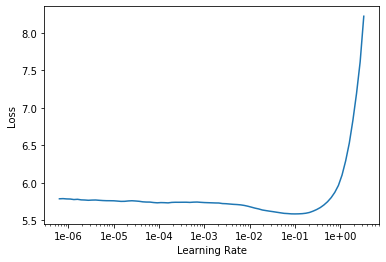

In [14]:
learn.recorder.plot()


In [15]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.638179,4.347761,0.260653,05:59
1,4.367937,4.187737,0.273484,05:59


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
label_cols = ['Natural Resources',
       'Music and Audio', 'Platforms', 'Information Technology',
       'Messaging and Telecommunications', 'Transportation', 'Consumer Goods',
       'Real Estate', 'Video', 'Navigation and Mapping',
       'Artificial Intelligence', 'Clothing and Apparel',
       'Administrative Services', 'Energy', 'Travel and Tourism',
       'Internet Services', 'Education', 'Commerce and Shopping', 'Sports',
       'Lending and Investments', 'Sustainability', 'Biotechnology',
       'Science and Engineering', 'Data and Analytics', 'Hardware',
       'Content and Publishing', 'Gaming', 'Sales and Marketing',
       'Financial Services', 'Government and Military', 'Mobile',
       'Media and Entertainment', 'Events', 'Payments', 'Consumer Electronics',
       'Health Care', 'Food and Beverage', 'Software', 'Professional Services',
       'Design', 'Agriculture and Farming', 'Privacy and Security',
       'Advertising', 'Manufacturing', 'Community and Lifestyle', 'Apps']

In [18]:
test_datalist = TextList.from_df(test, cols='comment_text', vocab=data.vocab)

data_clas = (TextList.from_df(train, cols='comment_text', vocab=data.vocab)
             .split_by_rand_pct(0.2)
             .label_from_df(cols= label_cols , classes=label_cols)
             .add_test(test_datalist)
             .databunch(bs=32))

data_clas.show_batch()

text,target
"xxbos usg is north america s leading producer of gypsum wallboard , joint compound and a vast array of related products for the xxunk corporation is a manufacturer and distributor of innovative , high - performance building systems through its united states gypsum company , usg interiors , llc , and l&w supply corporation subsidiaries and its usg boral building products joint venture . headquartered in chicago , usg worldwide",Real Estate;Science and Engineering;Design;Manufacturing
"xxbos thai lottery results , real time live stream lottery , update news about thai lotto and a trend xxunk lottery result with a fast update every time , you can check lottery results and read news about lotto on website and mobile . \r\r \n \r\r \n a , sa,?a,?a , ca,?a,- a , aa , ca,2a , ! a , ya,-a,.a1?a,.a,-a,?a,?a1^ a,^a,3a,?a,?a , "" ( siam lottery",Content and Publishing;Gaming;Media and Entertainment;Events;Software;Apps
"xxbos hollysys automation technologies is a leading provider of automation and control xxunk in 1993 , hollysys is a leading automation and it solutions provider in the region of china and southeast asia , focusing on the areas of process automation , factory automation , railway transport automation and mechanical & engineering ( m&e ) . in 2008 , hollysys was listed on nasdaq under the stock quote xxunk .",Science and Engineering;Software;Manufacturing;Apps
"xxbos linkedin , a professional networking site , allows its members to create business connections , search for jobs , and find potential xxunk is a professional networking site that allows its members to create business connections , search for jobs , and find potential clients . \r\r \n \r\r \n \r\r \n the site also enables its users to build and engage with their professional networks ; access",Internet Services;Media and Entertainment;Professional Services;Community and Lifestyle
"xxbos nova measuring instruments ltd . is a leading provider of advanced , high - throughput metrology xxunk measuring instruments ltd . is a leading provider of advanced , high - throughput metrology solutions for semiconductor manufacturing worldwide . \r\r \n \r\r \n used by over 80 % of the largest integrated - circuit manufacturers , novaa?ts solutions deliver the high - volume complex measurements required for effective process",Science and Engineering;Hardware;Consumer Electronics;Manufacturing


In [0]:
learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn_classifier.load_encoder('fine_tuned_enc')
learn_classifier.freeze() 


In [20]:
learn_classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


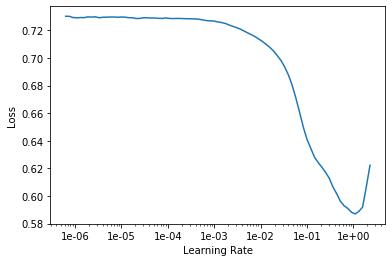

In [21]:
learn_classifier.recorder.plot()


In [22]:
learn_classifier.fit_one_cycle(2, 2e-2, moms=(0.8,0.7))


epoch,train_loss,valid_loss,time
0,0.220807,0.199546,02:10
1,0.212340,0.189884,02:08


In [23]:
learn_classifier.freeze_to(-2)
learn_classifier.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.202530,0.182660,02:43


In [24]:
learn_classifier.freeze_to(-3)
learn_classifier.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.193056,0.175489,03:53
1,0.184903,0.170799,04:12


In [44]:
learn_classifier.freeze_to(-4)
learn_classifier.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.175107,0.168375,05:36
1,0.172818,0.168086,05:10


In [40]:
learn_classifier.freeze_to(-5)
learn_classifier.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.177518,0.168657,05:38
1,0.173540,0.168204,05:14


In [48]:
learn_classifier.freeze_to(2)
learn_classifier.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.177308,0.168152,04:18


In [49]:
learn_classifier.freeze_to(3)
learn_classifier.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.174633,0.168205,02:33
1,0.169703,0.166995,02:48


In [25]:
learn_classifier.show_results()

text,target,prediction
"xxbos ringcentral , a global distributor of cloud - unified communications and collaboration solutions , offers its users with technology xxunk s cloud - based communication and collaboration platform offers a comprehensive set of capabilities that unify voice , business messaging , team collaboration , video conferencing , and online meetings . \r\r \n \r\r \n ringcentral revolutionizes the power of the cloud to help companies across the globe",Information Technology;Messaging and Telecommunications;Internet Services;Mobile;Software,Information Technology;Messaging and Telecommunications;Internet Services;Software
xxbos markel ventures makes permanent investments in businesses outside of the specialty insurance xxunk markel ventures they make permanent investments in businesses outside of the specialty insurance marketplace . \r\r \n \r\r \n their focus is long term ... really long term . they do not sell their businesses nor do they use excessive debt . their principal goal is to build profitable enterprises that will endure as part,Commerce and Shopping;Hardware;Financial Services;Health Care;Software;Manufacturing,Lending and Investments;Financial Services
"xxbos chembio diagnostics , inc . develops , manufactures , licenses and markets proprietary rapid xxunk diagnostics , inc . develops , manufactures , licenses and markets proprietary rapid diagnostic tests in the growing $ 10 billion point - of - care testing market . chembio s two fda pma - approved , clia - waived , rapid hiv tests are marketed in the u.s . by xxunk , inc",Biotechnology;Science and Engineering;Government and Military;Health Care;Manufacturing,Biotechnology;Science and Engineering;Health Care
"xxbos cross match technologies is a leading innovator and provider of biometric identity management solutions to xxunk is a world leader in biometric identity management solutions . our technologies and expertise are helping organizations of all sizes achieve new levels of efficiency , expand in new markets and find powerful new ways to protect people , property and profits . \r\r \n \r\r \n heavy reliance on digital transactions",Information Technology;Biotechnology;Science and Engineering;Data and Analytics;Hardware;Privacy and Security,Information Technology;Hardware;Consumer Electronics;Software;Privacy and Security
"xxbos the brink s company is a premier provider of secure logistics and security solutions including cash - in - transit , atm xxunk brink s company is a premier provider of secure logistics and security solutions including cash - in - transit , atm replenishment and maintenance , international transportation of valuables , cash management and payment services . their customers include financial institutions , retailers , government agencies",Administrative Services;Lending and Investments;Financial Services;Privacy and Security,Financial Services;Payments;Software


In [50]:
preds, target = learn_classifier.get_preds(DatasetType.Test, ordered=True)
labels = preds.numpy()

In [0]:
learn_classifier.save('model_attemp1')

In [27]:
labels

array([[3.759082e-05, 2.228091e-03, 9.706172e-02, 8.391588e-02, ..., 9.639511e-01, 4.595188e-04, 5.158257e-03,
        2.400543e-01],
       [3.499849e-04, 9.605848e-02, 6.804019e-01, 6.772931e-02, ..., 6.201521e-02, 7.937631e-04, 1.112259e-02,
        6.669511e-01],
       [6.567497e-02, 9.828153e-04, 6.008007e-02, 6.067788e-01, ..., 1.044370e-02, 1.653879e-02, 4.653581e-03,
        1.370636e-01],
       [4.773232e-02, 6.965382e-03, 2.509191e-03, 2.107337e-01, ..., 1.780873e-03, 9.376187e-01, 2.318577e-03,
        3.773947e-03],
       ...,
       [1.303022e-04, 6.862013e-03, 7.200207e-03, 1.496857e-01, ..., 1.446142e-02, 7.436231e-04, 2.853817e-01,
        5.456598e-02],
       [1.236654e-04, 8.280265e-05, 8.239504e-04, 7.274852e-01, ..., 1.493312e-03, 1.147925e-03, 1.289089e-03,
        1.995899e-02],
       [4.336471e-03, 3.278472e-03, 1.073125e-02, 6.124349e-01, ..., 1.123200e-02, 5.859238e-01, 7.266636e-03,
        1.880707e-02],
       [1.513283e-02, 2.469378e-03, 1.836912e-03, 

In [0]:
target

tensor([0, 0, 0,  ..., 0, 0, 0])

In [51]:
submission = pd.DataFrame({'id': test_id})
submission = pd.concat([submission, pd.DataFrame(preds.numpy(), columns = label_cols)], axis=1)

submission.to_csv('submission11.csv', index=False)
submission.head()

,id,Natural Resources,Music and Audio,Platforms,Information Technology,Messaging and Telecommunications,Transportation,Consumer Goods,Real Estate,Video,Navigation and Mapping,Artificial Intelligence,Clothing and Apparel,Administrative Services,Energy,Travel and Tourism,Internet Services,Education,Commerce and Shopping,Sports,Lending and Investments,Sustainability,Biotechnology,Science and Engineering,Data and Analytics,Hardware,Content and Publishing,Gaming,Sales and Marketing,Financial Services,Government and Military,Mobile,Media and Entertainment,Events,Payments,Consumer Electronics,Health Care,Food and Beverage,Software,Professional Services,Design,Agriculture and Farming,Privacy and Security,Advertising,Manufacturing,Community and Lifestyle,Apps
0,53591,0.000080,0.007232,0.164356,0.081921,0.022742,0.004985,0.000957,0.001209,0.028653,0.201099,0.027270,0.000786,0.000320,0.000368,0.006925,0.435365,0.003225,0.073308,0.003643,0.002365,0.000681,0.000335,0.009837,0.421354,0.084792,0.079069,0.018920,0.950797,0.017079,0.000386,0.889006,0.484464,0.012532,0.012497,0.019167,0.000924,0.002160,0.699440,0.001868,0.016296,0.000042,0.004140,0.933936,0.000385,0.004976,0.330173
1,45826,0.001002,0.059016,0.676808,0.053987,0.008631,0.011925,0.002291,0.002777,0.090958,0.088430,0.009183,0.001893,0.001343,0.000636,0.009979,0.243929,0.011957,0.066255,0.013362,0.002141,0.001350,0.000513,0.005782,0.173267,0.068832,0.508987,0.007245,0.051964,0.025871,0.001291,0.953706,0.862447,0.034931,0.008386,0.038256,0.003218,0.002048,0.904891,0.004824,0.020682,0.000031,0.002447,0.043749,0.000807,0.010309,0.697586
2,76744,0.028643,0.001269,0.078103,0.632617,0.004399,0.029871,0.011326,0.011146,0.001693,0.493923,0.141567,0.000997,0.004971,0.076610,0.003509,0.383369,0.005352,0.019661,0.005255,0.009772,0.060228,0.010277,0.156918,0.890641,0.329769,0.009072,0.001313,0.038322,0.025652,0.031130,0.367400,0.015454,0.000685,0.003425,0.163606,0.011938,0.007371,0.884358,0.037326,0.172530,0.102068,0.023467,0.004523,0.010899,0.006317,0.136611
3,51517,0.029152,0.003711,0.001663,0.224254,0.001171,0.173107,0.013719,0.121288,0.002184,0.002653,0.003365,0.000450,0.005634,0.562614,0.000163,0.059306,0.000863,0.036925,0.001926,0.000483,0.222164,0.000336,0.113794,0.020522,0.963750,0.002658,0.000330,0.020980,0.001982,0.005738,0.012361,0.019707,0.000534,0.000093,0.867046,0.002240,0.000655,0.232383,0.006945,0.046109,0.001345,0.006795,0.001286,0.903082,0.003053,0.004805
4,44883,0.001167,0.000079,0.000169,0.133757,0.000093,0.004343,0.000744,0.011829,0.000978,0.000226,0.952582,0.000329,0.000433,0.002067,0.000415,0.036581,0.006090,0.020674,0.000041,0.530418,0.001932,0.028261,0.913744,0.933061,0.049199,0.002153,0.000101,0.006805,0.974178,0.000346,0.006518,0.011298,0.000064,0.047709,0.008745,0.021076,0.000029,0.869772,0.021163,0.047800,0.000289,0.006330,0.000683,0.002775,0.002296,0.004253


In [52]:
copySubmission = submission.copy()
mySubmission = pd.DataFrame()
mySubmission['documentId']= submission['id']
mySubmission['category_groups_list']=''

for index, row in copySubmission.iterrows():
  myStr=''
  myList=list(row[1:])
  myList.sort(reverse=True)
  print(row[0])
  print("-------")
  print(row[1])
  if math.isnan(myList[0])==False:
    myStr=myStr+copySubmission.columns[list(row).index(myList[0])]+","
    myStr=myStr+copySubmission.columns[list(row).index(myList[1])]+","
    myStr=myStr+copySubmission.columns[list(row).index(myList[2])]+","
    myStr=myStr+copySubmission.columns[list(row).index(myList[3])]
    mySubmission.at[index,'category_groups_list']=myStr
    #print(myStr)
  else :
    mySubmission.at[index,'category_groups_list']=' NaN '
  #print(myList)
  

mySubmission.to_csv('mySubmission12.csv', index=False)





53591.0
-------
8.00628840806894e-05
45826.0
-------
0.0010019027395173907
76744.0
-------
0.02864287793636322
51517.0
-------
0.02915247716009617
44883.0
-------
0.0011674466077238321
60983.0
-------
4.215502485749312e-06
71046.0
-------
0.00040142558282241225
3780.0
-------
0.002292997669428587
2782.0
-------
0.0002033689961535856
7105.0
-------
0.00015673512825742364
49132.0
-------
0.00020297283481340855
2651.0
-------
0.004162777680903673
7515.0
-------
0.05624925345182419
42233.0
-------
0.0009762857225723565
71054.0
-------
0.0003606084210332483
52288.0
-------
0.0008920693071559072
30643.0
-------
0.0005158165586180985
50589.0
-------
0.002027936279773712
26194.0
-------
0.0008362424559891224
4500.0
-------
0.4962488114833832
63904.0
-------
0.0003621984797064215
16473.0
-------
0.00035690018557943404
53851.0
-------
0.0003273027250543237
66878.0
-------
0.0003482275642454624
75731.0
-------
0.043860822916030884
16590.0
-------
0.00019502297800499946
77107.0
-------
0.004673118

In [0]:
len(mySubmission)

5000